In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the CSV dataset into the DataFrame**

In [ ]:
%cd /content/drive/My Drive/
import pandas as pd
df = pd.read_csv('./Masters/assignment.csv')
df.head()

/content/drive/My Drive


,Author,Title,Poetry Foundation ID,Content,Tag
0,Hailey Leithauser,0,41729,"Philosophic\nin its complex, void emptiness,\n...",novel
1,Joseph Brodsky,01-Jan-65,56736,The Wise Men will unlearn your name.\nAbove yo...,poetry
2,Ted Berrigan,3 Pages,51624,For Jack Collom\n10 Things I do Every Day\n\np...,novel
3,Joe Brainard,30 One-Liners,58251,WINTER\nMore time is spent at the window.\n\nS...,novel
4,Naomi Shihab Nye,300 Goats,58630,In icy fields.\n\nIs water flowing in the tank...,poetry


**Title of each column in the dataframe**

In [ ]:
df.head(0) 

,Author,Title,Poetry Foundation ID,Content,Tag


**Information on the contents pf the dataframe**

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Author                41 non-null     object
 1   Title                 41 non-null     object
 2   Poetry Foundation ID  41 non-null     int64 
 3   Content               41 non-null     object
 4   Tag                   41 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.7+ KB


**Dropping columns Author, Title and ID**

In [ ]:
df_1 = df.drop(df.columns[[0,1,2]],axis= 1) 

In [ ]:
df_1.columns

Index(['Content', 'Tag'], dtype='object')

**Final DataFrame**

In [ ]:
df_1.head()

,Content,Tag
0,"Philosophic\nin its complex, void emptiness,\n...",novel
1,The Wise Men will unlearn your name.\nAbove yo...,poetry
2,For Jack Collom\n10 Things I do Every Day\n\np...,novel
3,WINTER\nMore time is spent at the window.\n\nS...,novel
4,In icy fields.\n\nIs water flowing in the tank...,poetry


# **Pre-processing the Data**

In [ ]:
pip install nltk

## **convert all text to lower-case**

In [ ]:
df_1['lowercase'] = df_1['Content'].apply(lambda Content: Content.lower())

In [ ]:
df_1.head()

,Content,Tag,lowercase
0,"Philosophic\nin its complex, void emptiness,\n...",novel,"philosophic\nin its complex, void emptiness,\n..."
1,The Wise Men will unlearn your name.\nAbove yo...,poetry,the wise men will unlearn your name.\nabove yo...
2,For Jack Collom\n10 Things I do Every Day\n\np...,novel,for jack collom\n10 things i do every day\n\np...
3,WINTER\nMore time is spent at the window.\n\nS...,novel,winter\nmore time is spent at the window.\n\ns...
4,In icy fields.\n\nIs water flowing in the tank...,poetry,in icy fields.\n\nis water flowing in the tank...


## **Remove Numbers**

In [ ]:
import re
import nltk
df_1['no_free'] = df_1['lowercase'].apply( lambda no_free: re.sub(r'\d+','', no_free))

In [ ]:
df_1.head()

,Content,Tag,lowercase,no_free
0,"Philosophic\nin its complex, void emptiness,\n...",novel,"philosophic\nin its complex, void emptiness,\n...","philosophic\nin its complex, void emptiness,\n..."
1,The Wise Men will unlearn your name.\nAbove yo...,poetry,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name.\nabove yo...
2,For Jack Collom\n10 Things I do Every Day\n\np...,novel,for jack collom\n10 things i do every day\n\np...,for jack collom\n things i do every day\n\npla...
3,WINTER\nMore time is spent at the window.\n\nS...,novel,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window.\n\ns...
4,In icy fields.\n\nIs water flowing in the tank...,poetry,in icy fields.\n\nis water flowing in the tank...,in icy fields.\n\nis water flowing in the tank...


## **Remove Punctuation**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#re.sub(r'[^\w\s]','',s)
df_1['punc_free'] = df_1['no_free'].apply( lambda punc_free: re.sub(r'[^\w\s]','',punc_free))

In [ ]:
df_1.head()

,Content,Tag,lowercase,no_free,punc_free
0,"Philosophic\nin its complex, void emptiness,\n...",novel,"philosophic\nin its complex, void emptiness,\n...","philosophic\nin its complex, void emptiness,\n...",philosophic\nin its complex void emptiness\na ...
1,The Wise Men will unlearn your name.\nAbove yo...,poetry,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name\nabove you...
2,For Jack Collom\n10 Things I do Every Day\n\np...,novel,for jack collom\n10 things i do every day\n\np...,for jack collom\n things i do every day\n\npla...,for jack collom\n things i do every day\n\npla...
3,WINTER\nMore time is spent at the window.\n\nS...,novel,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window\n\nsu...
4,In icy fields.\n\nIs water flowing in the tank...,poetry,in icy fields.\n\nis water flowing in the tank...,in icy fields.\n\nis water flowing in the tank...,in icy fields\n\nis water flowing in the tank\...


## **Remove Whitespaces** 

In [ ]:
#' '.join(.split())

df_1['space_free'] = df_1['punc_free'].apply( lambda space: ' '.join(space.split()))
#df_1.head()

In [ ]:
df_1.head()

,Content,Tag,lowercase,no_free,punc_free,space_free
0,"Philosophic\nin its complex, void emptiness,\n...",novel,"philosophic\nin its complex, void emptiness,\n...","philosophic\nin its complex, void emptiness,\n...",philosophic\nin its complex void emptiness\na ...,philosophic in its complex void emptiness a sk...
1,The Wise Men will unlearn your name.\nAbove yo...,poetry,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name\nabove you...,the wise men will unlearn your name above your...
2,For Jack Collom\n10 Things I do Every Day\n\np...,novel,for jack collom\n10 things i do every day\n\np...,for jack collom\n things i do every day\n\npla...,for jack collom\n things i do every day\n\npla...,for jack collom things i do every day play pok...
3,WINTER\nMore time is spent at the window.\n\nS...,novel,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window\n\nsu...,winter more time is spent at the window summer...
4,In icy fields.\n\nIs water flowing in the tank...,poetry,in icy fields.\n\nis water flowing in the tank...,in icy fields.\n\nis water flowing in the tank...,in icy fields\n\nis water flowing in the tank\...,in icy fields is water flowing in the tank wil...


## **Remove Stopwords**


In [ ]:
from nltk.corpus import stopwords
def stop_word(text):
  text = str(text)
  return([w for w in nltk.word_tokenize(text) if w not in stopwords.words('english')])


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
%%time
df_1['final_review'] = df_1['space_free'].apply(lambda text: [w for w in nltk.word_tokenize(text) if w not in stopwords.words('english')])

CPU times: user 745 ms, sys: 104 ms, total: 849 ms
Wall time: 854 ms


In [ ]:
df_1['final_review'].head()

0    [philosophic, complex, void, emptiness, skillf...
1    [wise, men, unlearn, name, head, star, flame, ...
2    [jack, collom, things, every, day, play, poker...
3    [winter, time, spent, window, summer, go, alon...
4    [icy, fields, water, flowing, tank, huddle, to...
Name: final_review, dtype: object

In [ ]:
df_1.head()

,Content,Tag,lowercase,no_free,punc_free,space_free,final_review
0,"Philosophic\nin its complex, void emptiness,\n...",novel,"philosophic\nin its complex, void emptiness,\n...","philosophic\nin its complex, void emptiness,\n...",philosophic\nin its complex void emptiness\na ...,philosophic in its complex void emptiness a sk...,"[philosophic, complex, void, emptiness, skillf..."
1,The Wise Men will unlearn your name.\nAbove yo...,poetry,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name\nabove you...,the wise men will unlearn your name above your...,"[wise, men, unlearn, name, head, star, flame, ..."
2,For Jack Collom\n10 Things I do Every Day\n\np...,novel,for jack collom\n10 things i do every day\n\np...,for jack collom\n things i do every day\n\npla...,for jack collom\n things i do every day\n\npla...,for jack collom things i do every day play pok...,"[jack, collom, things, every, day, play, poker..."
3,WINTER\nMore time is spent at the window.\n\nS...,novel,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window\n\nsu...,winter more time is spent at the window summer...,"[winter, time, spent, window, summer, go, alon..."
4,In icy fields.\n\nIs water flowing in the tank...,poetry,in icy fields.\n\nis water flowing in the tank...,in icy fields.\n\nis water flowing in the tank...,in icy fields\n\nis water flowing in the tank\...,in icy fields is water flowing in the tank wil...,"[icy, fields, water, flowing, tank, huddle, to..."


## **Store dataframe into pickle file**

In [ ]:
df_1.to_pickle('/content/drive/My Drive/Masters/final.pkl')

In [ ]:
test_1 = pd.read_pickle('/content/drive/My Drive/Masters/final.pkl')
test_1.head()

,Content,Tag,lowercase,no_free,punc_free,space_free,final_review
0,"Philosophic\nin its complex, void emptiness,\n...",novel,"philosophic\nin its complex, void emptiness,\n...","philosophic\nin its complex, void emptiness,\n...",philosophic\nin its complex void emptiness\na ...,philosophic in its complex void emptiness a sk...,"[philosophic, complex, void, emptiness, skillf..."
1,The Wise Men will unlearn your name.\nAbove yo...,poetry,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name\nabove you...,the wise men will unlearn your name above your...,"[wise, men, unlearn, name, head, star, flame, ..."
2,For Jack Collom\n10 Things I do Every Day\n\np...,novel,for jack collom\n10 things i do every day\n\np...,for jack collom\n things i do every day\n\npla...,for jack collom\n things i do every day\n\npla...,for jack collom things i do every day play pok...,"[jack, collom, things, every, day, play, poker..."
3,WINTER\nMore time is spent at the window.\n\nS...,novel,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window\n\nsu...,winter more time is spent at the window summer...,"[winter, time, spent, window, summer, go, alon..."
4,In icy fields.\n\nIs water flowing in the tank...,poetry,in icy fields.\n\nis water flowing in the tank...,in icy fields.\n\nis water flowing in the tank...,in icy fields\n\nis water flowing in the tank\...,in icy fields is water flowing in the tank wil...,"[icy, fields, water, flowing, tank, huddle, to..."


#**LSTM Model** 


In [ ]:
from gensim.models import Word2Vec
import gensim

model = Word2Vec(df_1['final_review'], min_count=2)
model.save('/content/drive/My Drive/Masters/word2vec.model')
print(model)

Word2Vec(vocab=637, size=100, alpha=0.025)


In [ ]:
import pandas as pd
words= pd.read_pickle('/content/drive/My Drive/Masters/final.pkl')
words.head()

,Content,Tag,lowercase,no_free,punc_free,space_free,final_review
0,"Philosophic\nin its complex, void emptiness,\n...",novel,"philosophic\nin its complex, void emptiness,\n...","philosophic\nin its complex, void emptiness,\n...",philosophic\nin its complex void emptiness\na ...,philosophic in its complex void emptiness a sk...,"[philosophic, complex, void, emptiness, skillf..."
1,The Wise Men will unlearn your name.\nAbove yo...,poetry,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name\nabove you...,the wise men will unlearn your name above your...,"[wise, men, unlearn, name, head, star, flame, ..."
2,For Jack Collom\n10 Things I do Every Day\n\np...,novel,for jack collom\n10 things i do every day\n\np...,for jack collom\n things i do every day\n\npla...,for jack collom\n things i do every day\n\npla...,for jack collom things i do every day play pok...,"[jack, collom, things, every, day, play, poker..."
3,WINTER\nMore time is spent at the window.\n\nS...,novel,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window\n\nsu...,winter more time is spent at the window summer...,"[winter, time, spent, window, summer, go, alon..."
4,In icy fields.\n\nIs water flowing in the tank...,poetry,in icy fields.\n\nis water flowing in the tank...,in icy fields.\n\nis water flowing in the tank...,in icy fields\n\nis water flowing in the tank\...,in icy fields is water flowing in the tank wil...,"[icy, fields, water, flowing, tank, huddle, to..."


In [ ]:
words['final_review_text'] = words['final_review'].apply( lambda name : ' '.join(name))
words.head()

,Content,Tag,lowercase,no_free,punc_free,space_free,final_review,final_review_text
0,"Philosophic\nin its complex, void emptiness,\n...",novel,"philosophic\nin its complex, void emptiness,\n...","philosophic\nin its complex, void emptiness,\n...",philosophic\nin its complex void emptiness\na ...,philosophic in its complex void emptiness a sk...,"[philosophic, complex, void, emptiness, skillf...",philosophic complex void emptiness skillful pu...
1,The Wise Men will unlearn your name.\nAbove yo...,poetry,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name.\nabove yo...,the wise men will unlearn your name\nabove you...,the wise men will unlearn your name above your...,"[wise, men, unlearn, name, head, star, flame, ...",wise men unlearn name head star flame one wear...
2,For Jack Collom\n10 Things I do Every Day\n\np...,novel,for jack collom\n10 things i do every day\n\np...,for jack collom\n things i do every day\n\npla...,for jack collom\n things i do every day\n\npla...,for jack collom things i do every day play pok...,"[jack, collom, things, every, day, play, poker...",jack collom things every day play poker drink ...
3,WINTER\nMore time is spent at the window.\n\nS...,novel,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window.\n\ns...,winter\nmore time is spent at the window\n\nsu...,winter more time is spent at the window summer...,"[winter, time, spent, window, summer, go, alon...",winter time spent window summer go along day d...
4,In icy fields.\n\nIs water flowing in the tank...,poetry,in icy fields.\n\nis water flowing in the tank...,in icy fields.\n\nis water flowing in the tank...,in icy fields\n\nis water flowing in the tank\...,in icy fields is water flowing in the tank wil...,"[icy, fields, water, flowing, tank, huddle, to...",icy fields water flowing tank huddle together ...


In [ ]:
new_df = words[['final_review_text', 'Tag']]
new_df.head()

,final_review_text,Tag
0,philosophic complex void emptiness skillful pu...,novel
1,wise men unlearn name head star flame one wear...,poetry
2,jack collom things every day play poker drink ...,novel
3,winter time spent window summer go along day d...,novel
4,icy fields water flowing tank huddle together ...,poetry


In [ ]:
words['Tag'] = words['Tag'].replace( 'novel',0)
words['Tag'] = words['Tag'].replace( 'poetry',1)

In [ ]:
new_df = words[['final_review_text', 'Tag']]
new_df.head()

,final_review_text,Tag
0,philosophic complex void emptiness skillful pu...,0
1,wise men unlearn name head star flame one wear...,1
2,jack collom things every day play poker drink ...,0
3,winter time spent window summer go along day d...,0
4,icy fields water flowing tank huddle together ...,1


In [ ]:
final_text = new_df['final_review_text'].values
final_text

array(['philosophic complex void emptiness skillful pundit coined sort stopgap doorstop quaint equations romans never dreamt form completely clever discretea mirror come unsilvered loose watch face without works hollowed globe tip toe unbroken evades grappling hooks mass tilts thin rim thing remains embryonic sum noncogito',
       'wise men unlearn name head star flame one weary sound hoarse roar gale shadows fall tired eyes lone bedside candle dies calendar breeds nights till stores candles fail prompts melancholy key long familiar melody sounds let let sound night let sound hour death gratefulness eyes lips sometimes makes us lift gaze far sky glare silence wall stocking gapes gifts clear old trust good saint nick late miracles suddenly lifting eyes heavens light realize life sheer gift',
       'jack collom things every day play poker drink beer smoke pot jack curse waters manhattan flower positive amp negative go home read lunch poems hunker changes life goes quite merrily blue he

**OneHot Encoding**

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 100 #vocabulary size Word2Vec(vocab=711, size=100, alpha=0.025)
onehot_re = [one_hot(words, vocab_size) for words in final_text ]
len(onehot_re)

41

**Word Embedding**

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=200)
# word embedding
maxlen = 350
padding = pad_sequences(onehot_re, maxlen = maxlen,padding='post')
len(padding)
padding

array([[61, 14, 70, 79, 11, 67, 54, 22, 61, 91, 19, 14, 93, 45, 43, 17, 32, 14, 67, 47, 25, 30, 87, 83, 70, 62, 62, 30, 70, 73, 97, 75, 24, 86, 77,  6, 20, 56,  5, 16, 79, 39, 66, 84,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 

**Training, Validaton and Testing Split**

In [ ]:
from sklearn.model_selection import train_test_split
score = new_df['Tag'].factorize()
len(score[0])
score[0]

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(padding,score[0], test_size = 0.2, random_state = 0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size= 0.2, random_state = 0)

In [ ]:
X_train

array([[55, 99, 31, 28, 86, 52, 78, 93, 35, 53, 96, 12, 86, 97, 56, 14, 36, 35, 83, 30, 21, 13, 49, 42, 40, 61, 75, 32, 72, 93, 39, 98, 92, 13, 18, 72, 70,  8, 98, 25, 31, 34, 84, 45, 62, 49, 34,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 

In [ ]:
y_train

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
X_val

array([[89, 38, 96, 38, 95, 42, 18, 55,  3, 58, 95, 12, 78, 12, 78, 11, 57, 64, 95, 33, 59,  9, 52, 58, 56, 60, 42, 30, 77, 24, 71, 84, 11,  2, 18, 25, 65, 62, 39, 50, 38, 42, 79, 24, 52, 98, 95,
        95, 38,  8, 86, 42, 29, 42, 29, 96, 22,  8, 85, 26, 81, 41,  3, 26, 92, 53, 53,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 

In [ ]:
X_test

array([[50, 62, 29, 97, 66, 69, 38, 32, 64, 49, 36, 46, 51, 69, 96, 13, 50, 35, 96,  6, 43, 74, 73, 74, 50,  1, 68, 12, 14, 81, 87, 79, 30, 52, 77, 12, 26, 26, 49,  4, 36, 36, 73, 23, 14, 96, 37,
        54, 98, 19, 18, 66, 81, 49, 36, 84, 83, 12, 98, 85, 18, 12, 49, 36, 65, 18, 37, 60, 93, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 

In [ ]:
dim = 41

**LSTM model building**

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Dense, Dropout, Activation, Input, LSTM, GRU 
from keras.optimizers import SGD
from keras.callbacks import TensorBoard
from keras.callbacks import LambdaCallback
import tensorflow as tf 
#tf.compat.v1.enable_eager_execution()

model = Sequential()
model.call = tf.function(model.call)
model.add(Embedding(vocab_size, dim, input_length=maxlen))
#model.add(Dropout(.2))
model.add(LSTM(41,return_sequences=True, input_shape=(vocab_size, dim)))
#model.add(Dropout(.2))
model.add(GRU(41))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation="relu"))

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer= 'adam',loss='binary_crossentropy', metrics= ['accuracy'])#,run_eagerly=True)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 350, 41)           4100      
_________________________________________________________________
lstm_2 (LSTM)                (None, 350, 350)          548800    
_________________________________________________________________
gru_2 (GRU)                  (None, 350)               737100    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3510      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,293,521
Trainable params: 1,293,521
Non-trainable params: 0
_________________________________________________________________


**Model Fitting**

In [ ]:
%%time
model.fit(X_train,y_train,epochs=20,validation_data= (X_val,y_val),batch_size= 4,callbacks = [print_weights])

In [ ]:

# Load the TensorBoard notebook extension
%reload_ext tensorboard

import tensorflow as tf
import datetime

# Clear any logs from previous runs
!rm -rf ./logs/ 

# Disable V2 behavior
tf.compat.v1.disable_v2_behavior()
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tb = tf.compat.v1.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_grads =True)

#tb = TensorBoard(histogram_freq=1, write_grads=True)
model.fit(X_train,y_train,epochs=20,validation_data= (X_val,y_val),batch_size= 4,callbacks = [tb])

%tensorboard --logdir logs/fit

**Confusion Matrix**  

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = (model.predict(X_test))
predictions = np.round(predictions)
cm= confusion_matrix(y_test, predictions)
print(cm)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[[5 0]
 [4 0]]


In [ ]:
from sklearn.metrics import accuracy_score

# Getting score metrics from our model
accuracy_score = model.evaluate(X_test, y_test, verbose=0)

# Displays the accuracy of correct sentiment prediction over test data
print("Accuracy: %.2f%%" % (accuracy_score[1]*100))

Accuracy: 55.56%


In [ ]:
from sklearn.metrics import classification_report
target_names = ['poetry','novel']
print(classification_report(y_test,predictions, target_names=target_names))

              precision    recall  f1-score   support

      poetry       0.56      1.00      0.71         5
       novel       0.00      0.00      0.00         4

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


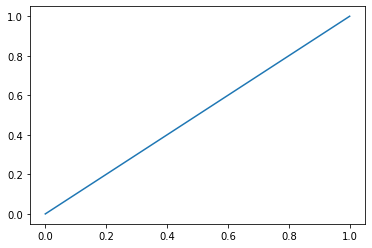

AUC: 0.5


In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

#y_true = # true labels
#y_probas = # predicted results
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [ ]:
# predict on a sample text without padding.
# to select the 4th poetry in the dataframe and to predict its category.
predictions = model.predict(onehot_re[4])
predictions[4]

ValueError: ignored

In [ ]:
if (predictions[4]>=0.5):
  print("Text is Poetry")
else: 
  print("Text is Novel ")